# merge_ordered()

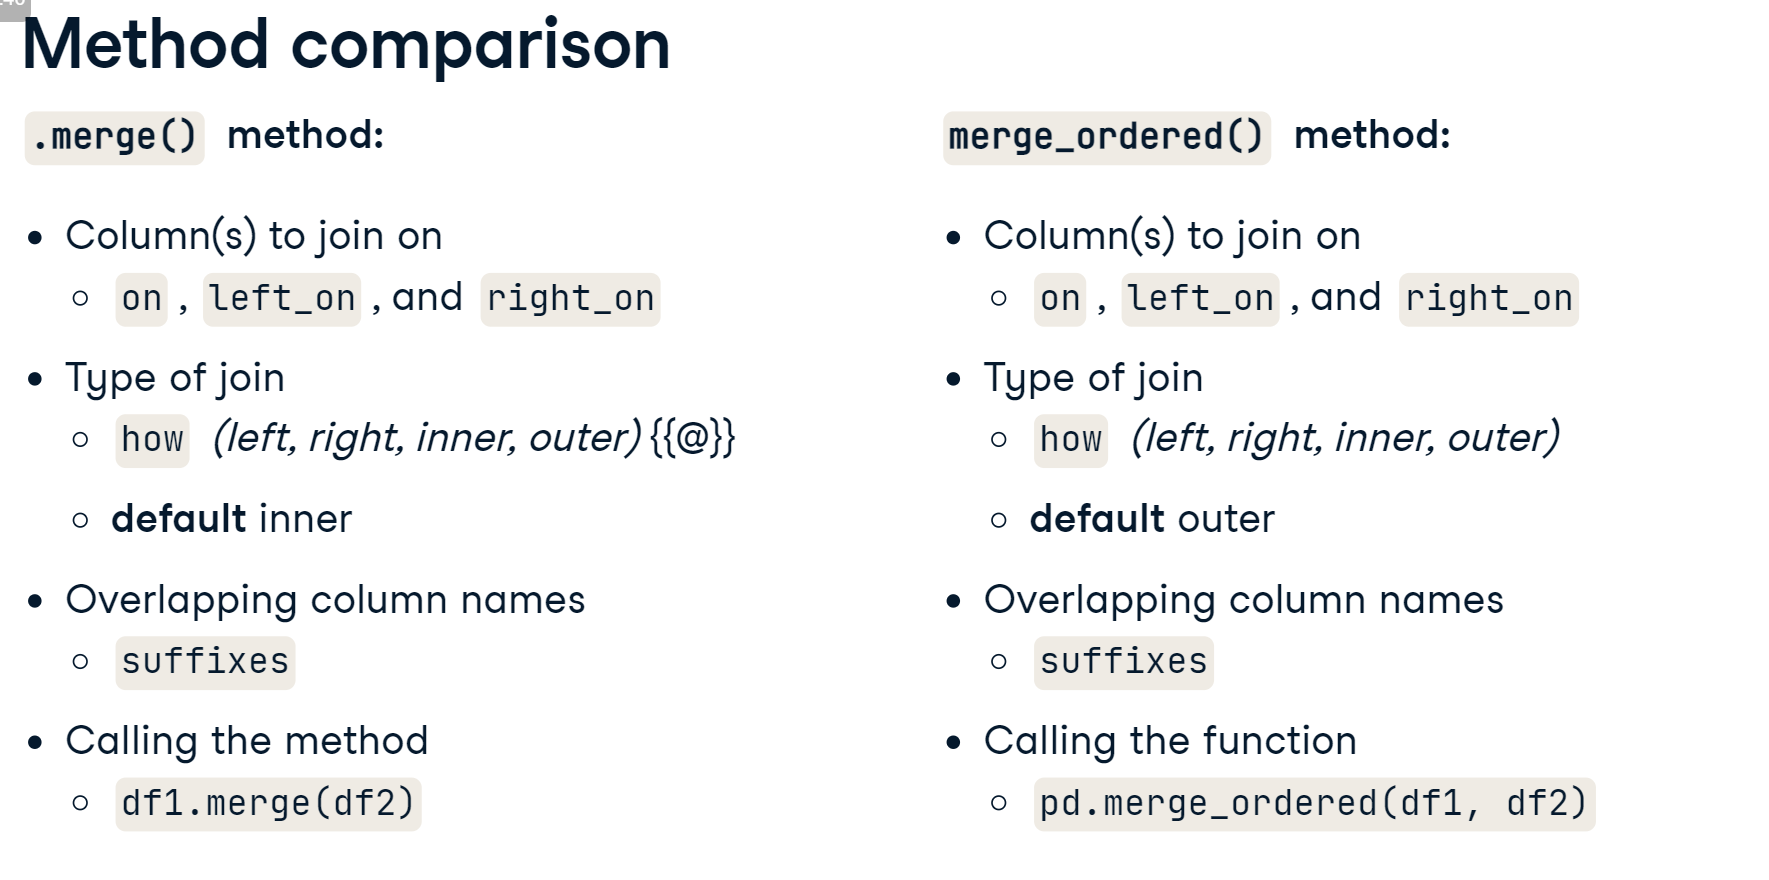

- Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", how="left")

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", how="left", fill_method="ffill")

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["gdp","returns"]]

# Print gdp_returns correlation
print (gdp_returns.corr())

- Phillips curve using merge_ordered()

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on="date", how="inner")

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind="scatter",x="unemployment_rate",y="cpi")
plt.show()

- merge_ordered() caution, multiple columns

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [ ]:
# Merge gdp and pop on date and country with forward fill
ctry_date = pd.merge_ordered(gdp,pop,on=["date","country"], 
                             fill_method='ffill')

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp,pop,on=["country","date"], 
                             fill_method='ffill')

# merge_asof()

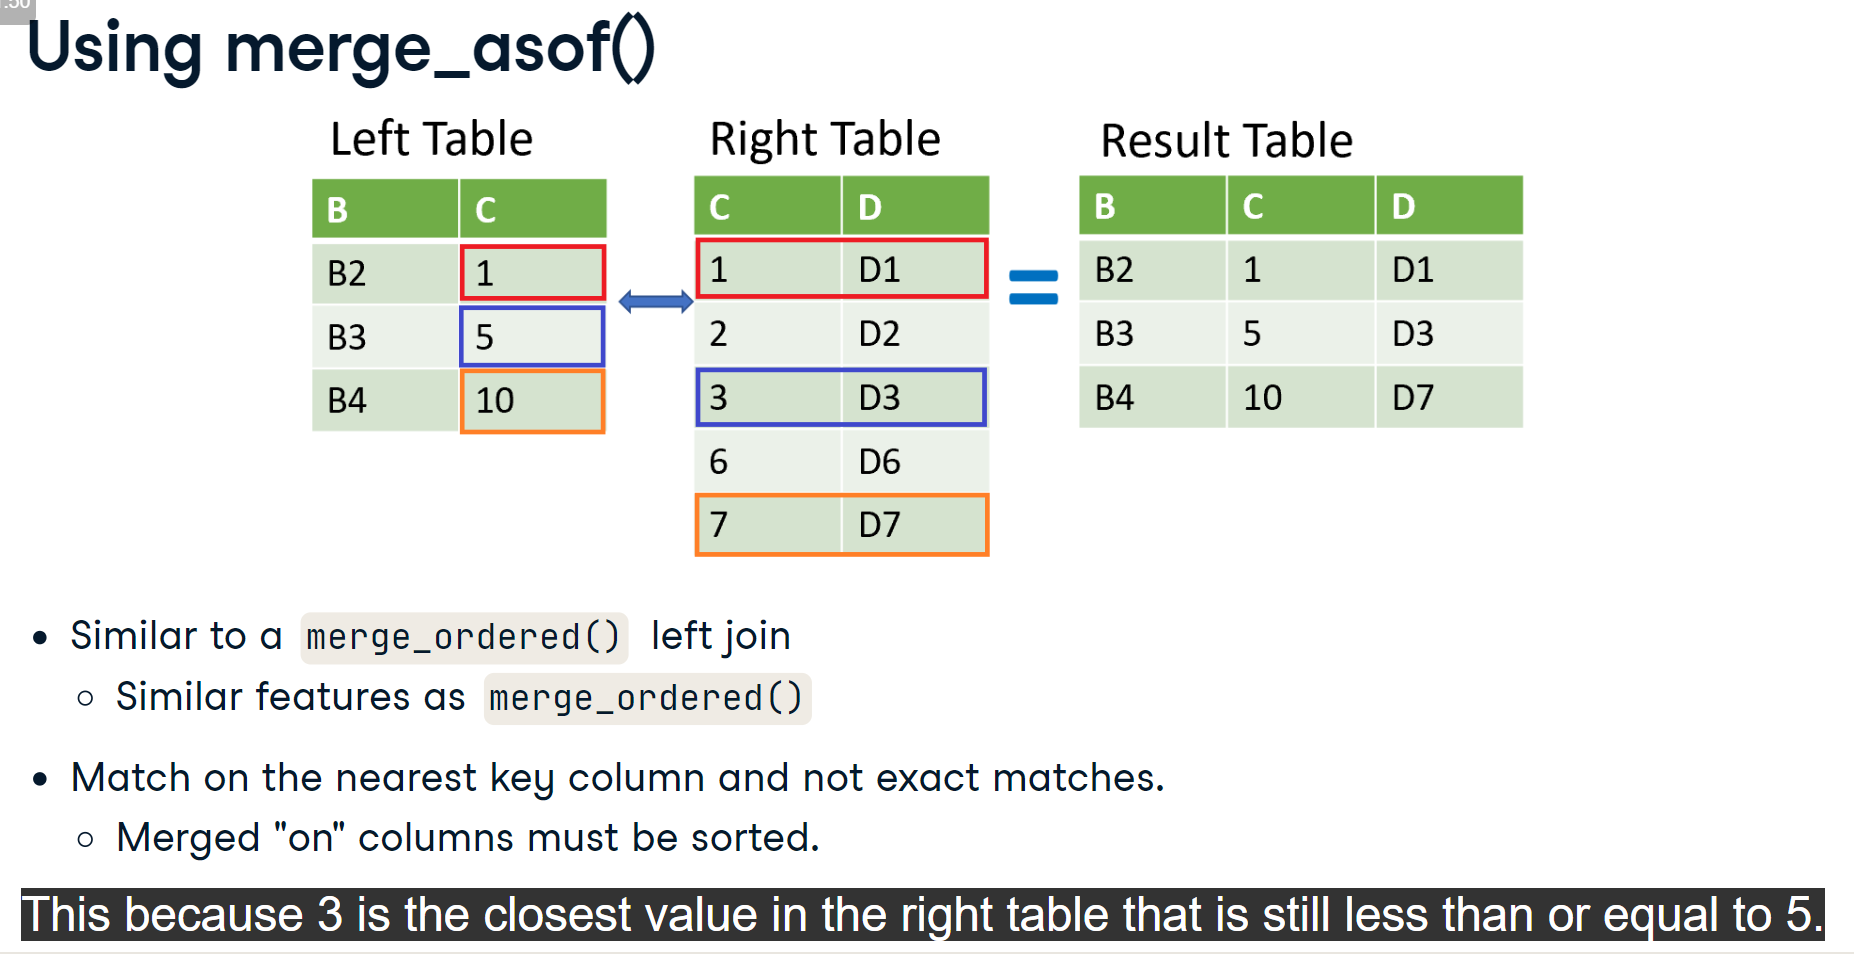

- Using merge_asof() to study stocks

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

- Using merge_asof() to create dataset

The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

In [ ]:
#Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
gdp_recession = pd.merge_asof(gdp,recession,on="date")

#Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

#Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession
gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)
plt.show()

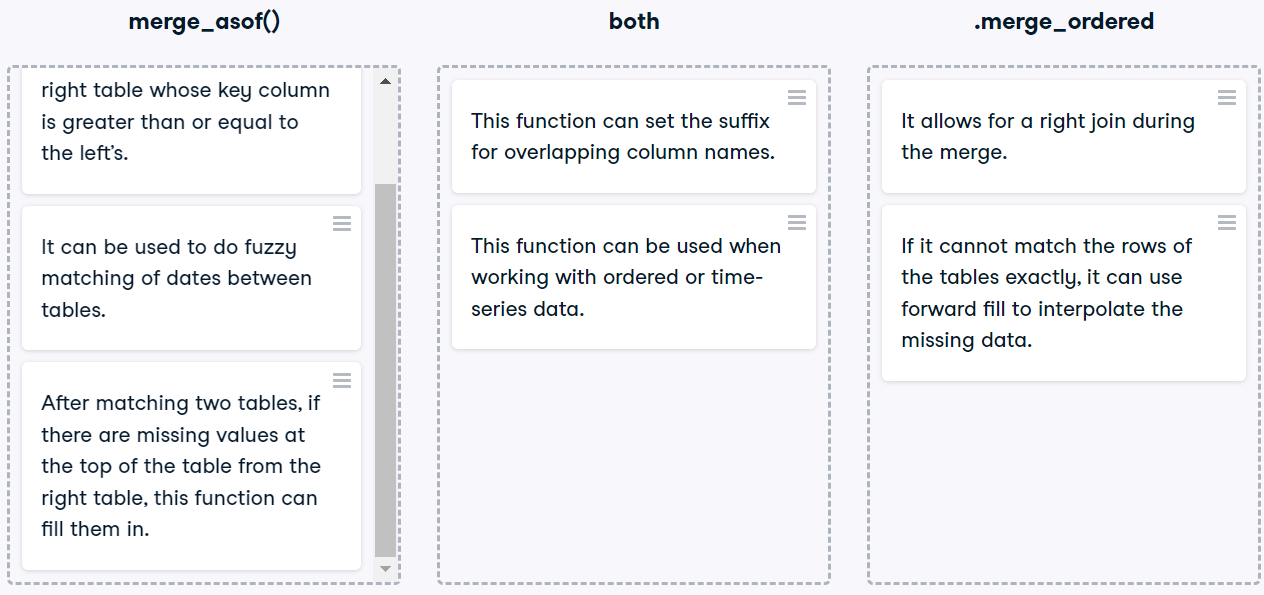

# .query()

- Explore financials with .query()

You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the .query() method and the IPython shell to explore social_fin and select the True statement.

In [ ]:
# Possible answers
# There 2 rows where the value is greater than $50,000,000K.
print(social_fin.query("value > 50000000"))
"""
        financial   company  year     value
5   total_revenue  facebook  2019  70697000
7    gross_profit  facebook  2019  57927000
20  total_revenue  facebook  2018  55838000"""

# There are 3 rows for total revenue for Facebook.
print(social_fin.query("financial == 'total_revenue' and company == 'facebook'"))
"""
        financial   company  year     value
5   total_revenue  facebook  2019  70697000
20  total_revenue  facebook  2018  55838000
35  total_revenue  facebook  2017  40653000
50  total_revenue  facebook  2016  27638000"""

# There are 6 rows where the net income has a negative value.
print(social_fin.query("financial == 'net_income' and value < 0"))
"""
     financial  company  year    value
14  net_income     snap  2019 -1033660
29  net_income     snap  2018 -1255911
34  net_income  twitter  2017  -108063
44  net_income     snap  2017 -3445066
49  net_income  twitter  2016  -456873
59  net_income     snap  2016  -514643"""

# There are 45 rows, where the gross profit is greater than $100K.
print(social_fin.query("financial == 'gross_profit' and value>100000"))
"""
       financial   company  year     value
2   gross_profit   twitter  2019   2322288
7   gross_profit  facebook  2019  57927000
12  gross_profit      snap  2019    819696
17  gross_profit   twitter  2018   2077362
22  gross_profit  facebook  2018  46483000
27  gross_profit      snap  2018    381581
32  gross_profit   twitter  2017   1582057
37  gross_profit  facebook  2017  35199000
42  gross_profit      snap  2017    107487
47  gross_profit   twitter  2016   1597379
52  gross_profit  facebook  2016  23849000"""

- Subsetting rows with .query()

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# .melt()

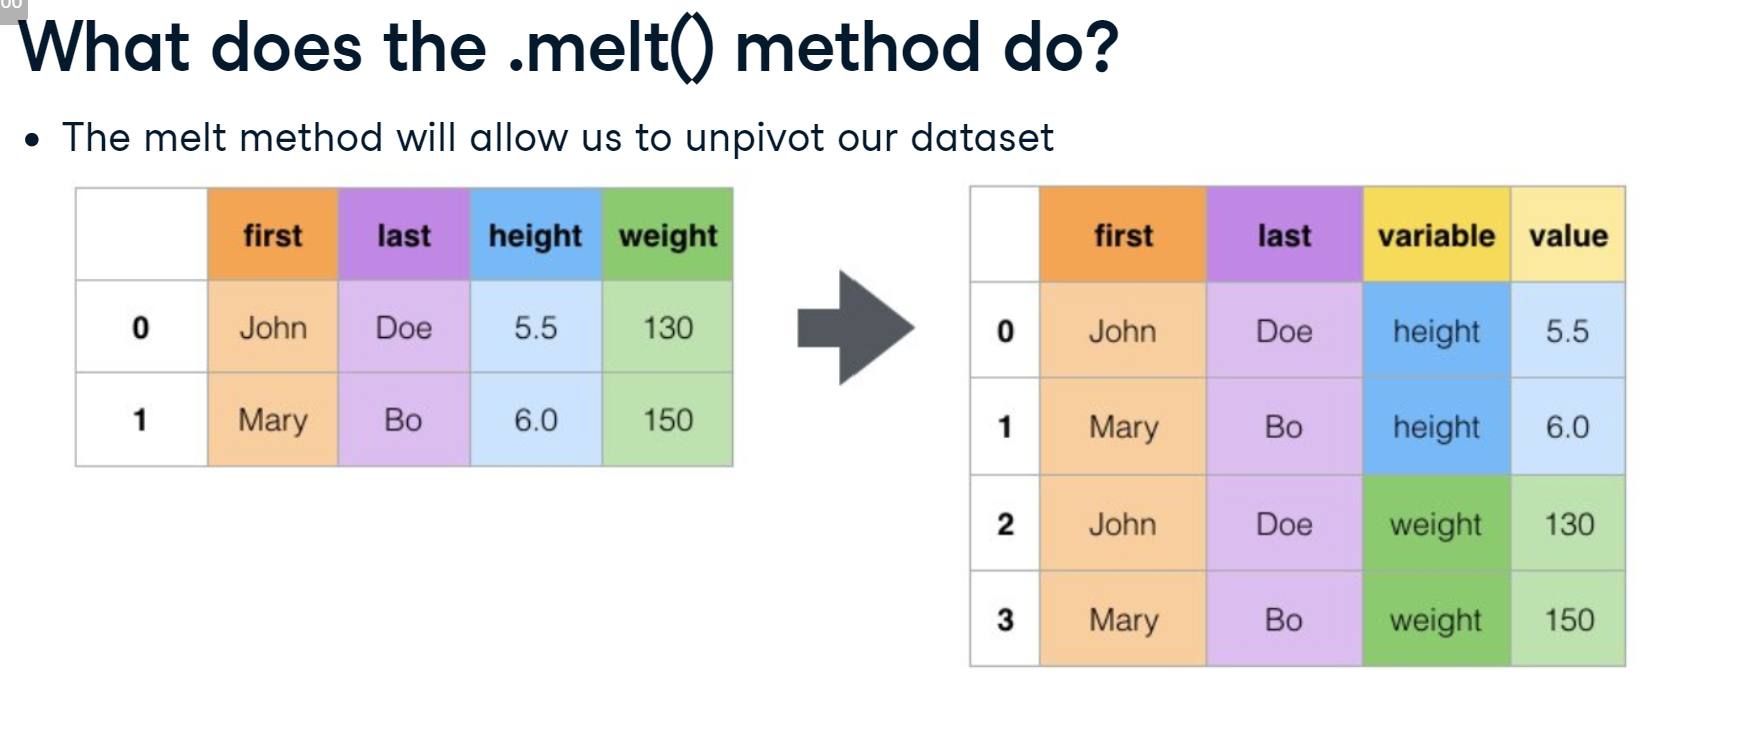

In [ ]:
print(inflation)
"""
  country    indicator  2017  2018  2019
0  Brazil  Inflation %  3.45  3.66  3.73
1  Canada  Inflation %  1.60  2.27  1.95
2  France  Inflation %  1.03  1.85  1.11
3   India  Inflation %  2.49  4.86  7.66"""

print(inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual'))
"""
   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66"""

- Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

In [ ]:
""" TABLE ur_wide
    year  jan  feb  mar  apr  ...  aug  sep  oct  nov  dec
0   2010  9.8  9.8  9.9  9.9  ...  9.5  9.5  9.4  9.8  9.3
1   2011  9.1  9.0  9.0  9.1  ...  9.0  9.0  8.8  8.6  8.5
2   2012  8.3  8.3  8.2  8.2  ...  8.1  7.8  7.8  7.7  7.9
3   2013  8.0  7.7  7.5  7.6  ...  7.2  7.2  7.2  6.9  6.7
4   2014  6.6  6.7  6.7  6.2  ...  6.1  5.9  5.7  5.8  5.6
5   2015  5.7  5.5  5.4  5.4  ...  5.1  5.0  5.0  5.1  5.0
6   2016  4.9  4.9  5.0  5.0  ...  4.9  5.0  4.9  4.7  4.7
7   2017  4.7  4.6  4.4  4.4  ...  4.4  4.2  4.1  4.2  4.1
8   2018  4.1  4.1  4.0  4.0  ...  3.8  3.7  3.8  3.7  3.9
9   2019  4.0  3.8  3.8  3.6  ...  3.7  3.5  3.6  3.5  3.5
10  2020  3.6  3.5  4.4  NaN  ...  NaN  NaN  NaN  NaN  NaN
"""

# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=["year"], var_name='month', value_name='unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(y="unempl_rate",x="date")
plt.show()

- Using .melt() for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

In [ ]:
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

fn_dji = 'https://assets.datacamp.com/production/repositories/5486/datasets/0d7a5809f87e8afec8e94619f9534304449b9eaa/DJI_perc.p'
fn_bond = 'https://assets.datacamp.com/production/repositories/5486/datasets/d4467a1a53c357d5b7ca611d0a05b7d6dd1fc238/TNX_horz_perc.p'

ten_yr = pd.read_pickle(urllib.request.urlopen(fn_bond))
dji = pd.read_pickle(urllib.request.urlopen(fn_dji))

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', 
                            suffixes=('_dow', '_bond'), how='inner')

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()